In [1]:
# instalar wordcloud caso você não tenha
!pip install wordcloud -q

In [3]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [7]:
# importar o arquivo csv em um df
df = pd.read_csv('/content/listings.csv')


In [18]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,2.021122e+13,2021-12-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997.0,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived in NYC for ...,within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96599,-43.17940,Entire condominium (condo),Entire home/apt,5.0,NaN,1 bath,2.0,2.0,"[""Bed linens"", ""Stove"", ""Elevator"", ""Cable TV""...",$350.00,5.0,180.0,5.0,5.0,180.0,180.0,5.0,180.0,NaN,t,0.0,22.0,24.0,257.0,2021-12-25,267.0,10.0,1.0,2010-07-15,2021-12-03,4.68,4.78,4.63,4.82,4.90,4.76,4.66,NaN,f,1.0,1.0,0.0,0.0,1.92
1,24480,https://www.airbnb.com/rooms/24480,2.021122e+13,2021-12-25,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249.0,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\nI am a human being fighting f...,a few days or more,100%,100%,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98405,-43.20189,Entire rental unit,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Dining table"",...",$296.00,3.0,90.0,3.0,7.0,10.0,1125.0,3.1,1087.2,NaN,t,0.0,0.0,0.0,107.0,2021-12-25,85.0,0.0,0.0,2010-09-26,2018-02-14,4.73,4.83,4.78,4.90,4.90,4.97,4.58,NaN,f,1.0,1.0,0.0,0.0,0.62
2,25026,https://www.airbnb.com/rooms/25026,2.021122e+13,2021-12-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840.0,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,80%,41%,f,https://a0.muscache.com/im/pictures/user/9e204...,https://a0.muscache.com/im/pictures/user/9e204...,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97735,-43.19105,Entire

In [19]:
# eliminar as colunas com valores ausentes
description = df.dropna(subset=['description'], axis=0)['description']

In [14]:
description


0        Discounts for long term stays. <br />- Large b...
1        My studio is located in the best of Ipanema, t...
2        Our apartment is a little gem, everyone loves ...
3        This cosy apartment  is just a few steps away ...
4        Our newly renovated studio is located in the b...
                               ...                        
21619    <b>Other things to note</b><br />Welcome to Om...
21620    Você vai adorar a decoração estilosa deste cha...
21621    Sua família vai estar perto de tudo ao ficar n...
21622    quarto aconchegante, espaço criado  para seu c...
21623    Quarto e banheiro privativos em casa de famíli...
Name: description, Length: 20605, dtype: object

In [20]:
# exemplos de descrições para os imóveis no Airbnb
display(description.iloc[100])
display(description.iloc[120])
display(description.iloc[133])

'Very special localization!!! <br />Between Copacabana and Ipanema, 2 minutes from the subway station Ipanema (General Osório), excellent location, easy access to all parts of the city.<br />Restaurants supermarkets, pharmacies, bars, parks, botanical garden, sports courts free at Lagoa Rodrigo de Freitas<br /><br /><b>The space</b><br />Between Ipanema and Copacabana, near from  Ipanema Metro station in a fully residential street. The building has Concierge fulltime and security cameras.<br />I have a daughter studying Master in Law and I just retired!<br /><br />We are looking for nice girls who speak primarily English, but speak a little Italian and Spanish.<br />You can use the kitchen and wash clothes in the washing machine.<br />We Have WIFI.<br /><br /><b>Guest access</b><br />Tv, dvd, washing machine, kitchen, bathroom with Jacuzzi, living room, dining room, laundry area, new air condicioner.<br />Two single beds in the room<br /><br /><b>Other things to note</b><br />C'

'Studio apartment with garden and awesome views  on a quiet cul-de-sac street in the artsy Santa Teresa neighborhood, with a park and cultural centre right across the street.  Owned by A Brazilian-Canadian couple. Local Rio de Janeiro at its best!<br /><br /><b>The space</b><br />A studio apartment on Rua Murtinho Nobre in Santa Teresa is available for short term rentals. The studio is owned by a Brazilian-Canadian couple who work in the arts. It has a bathroom with large shower and kitchenette with all the basics. The apartment overlooks a garden which guests are free to use, boasting hibiscus plants and a pitanga tree and flanked by jambu and avocado trees. The garden has an outdoor shower for cooling off on hot summer days. As we are on a hill, the apartment has a fabulous view of greenery as well as of the Centro, arches of Lapa, Cathedral, Bay of Guanabara & bridge to Niteroi. The studio has been a home away from home for visiting journalists, musicians, architects, as well as to 

"It's a comfortable room and is located on the terrace with a special feature: you can get out through the window directly on the terrace and see a beautiful view of downtown and the Guanabara Bay and enjoy our small pool to relax.<br /><br /><b>The space</b><br />Our happiness is to share our home with all the people who are in the movement of construction of love and respect for differences. We are very grateful to know people from all over the world.<br /><br /><b>Guest access</b><br />We shared our terrace.<br /><br /><b>Other things to note</b><br />We have a very sweet cat who likes affection!"

In [22]:
# concatenar as palavras
all_description = " ".join(s for s in description)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_description)))

Quantidade de Palavras: 13340591


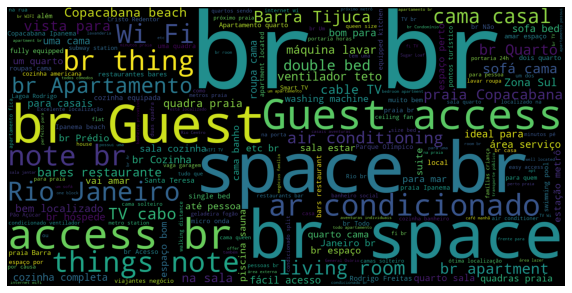

In [23]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_description)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_description_wordcloud.png")

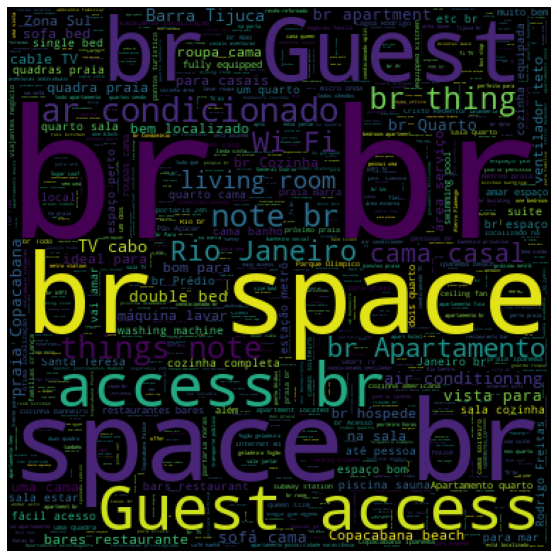

In [24]:
# endereço LOCAL da SUA imagem
tim_mask = np.array(Image.open('/content/a59f4d6378f8522f803cea3712e5cc58.jpg'))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=tim_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file('/content/a59f4d6378f8522f803cea3712e5cc58.jpg')